In [8]:
from manim import *
# config.media_width = "75%"
config.verbosity = "WARNING"
config.background_color = WHITE

color_off = GRAY_A
color_on = BLACK

In [11]:
def set_the_stage(scene: Scene):
    agv = RoundedRectangle(corner_radius=0.5, height=4.0, width=8.0, stroke_color=BLACK)
    scene.add(agv)

Manim Community v0.18.1

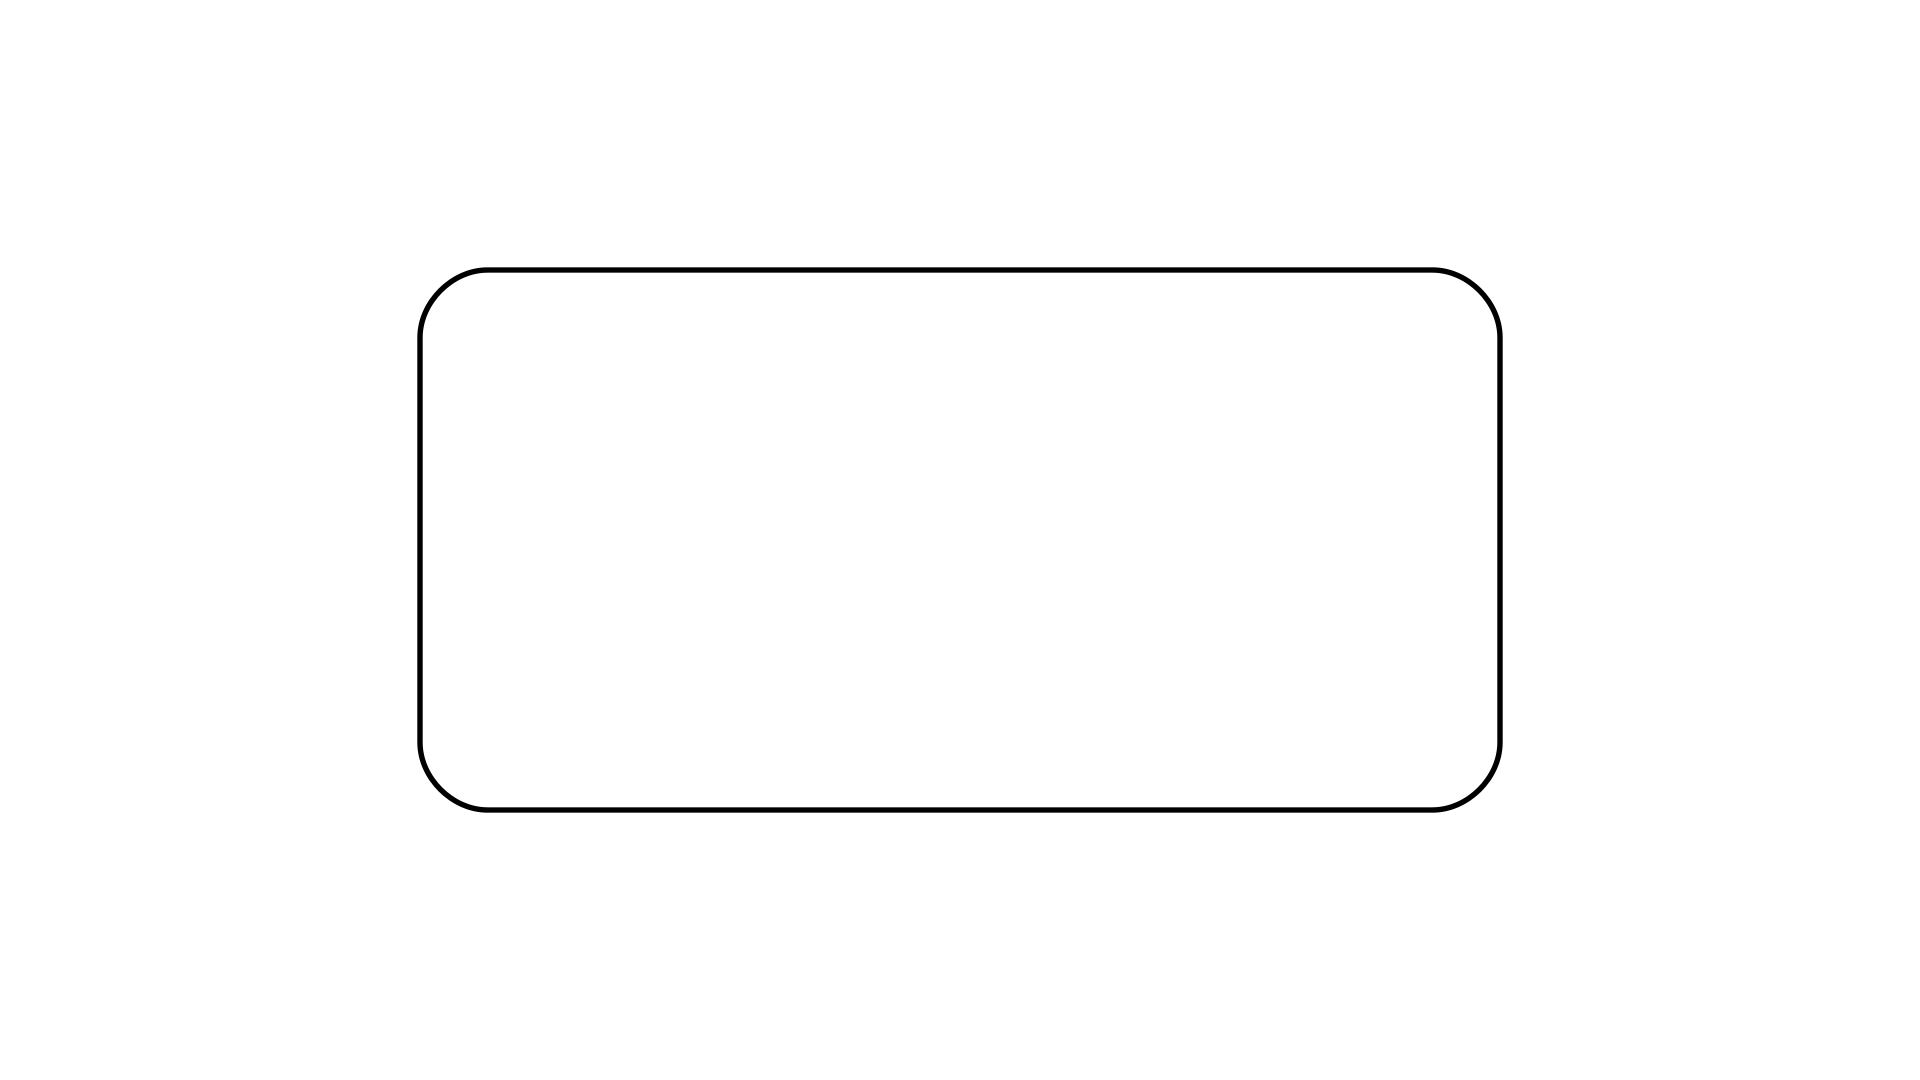

In [12]:
%%manim -qh Trial
class Trial(Scene):
    def construct(self):
        set_the_stage(self)